In [2]:
import regex as re
import pandas as pd

In [3]:
F = open('WhatsApp Chat with MTF 21.txt','r',encoding='utf-8')
data = F.read()

In [4]:
print(data)

3/21/22, 12:18 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
3/21/22, 16:24 - +91 94628 01367 added +91 83190 71700
3/21/22, 17:48 - v suryanshu: This message was deleted
3/21/22, 17:48 - +91 96826 38110: 🤚🏻🤚🏻🤚🏻
3/22/22, 14:29 - +91 87709 36337: <Media omitted>
3/22/22, 14:29 - +91 87709 36337: Ever felt confused regarding crypto and blockchain?Ever felt that they are too hyped up? Ever felt that they are one and the same thing? Well then this is the session for you . 

eDC-IIT Delhi, in association with TerraIndia, brings to you a panel-based session where representatives from Terra, Staderlabs, Flint and LeapWallet will be participating.The event will answer all your doubts regarding WEB3 space and introduce you to the careers in this sphere. The event aims to create awareness on development and entrepreneurial opportunities available with Terra, an open-source blockchain. It will be a lig

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
messages
# len(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 94628 01367 added +91 83190 71700\n',
 'v suryanshu: This message was deleted\n',
 '+91 96826 38110: 🤚🏻🤚🏻🤚🏻\n',
 '+91 87709 36337: <Media omitted>\n',
 '+91 87709 36337: Ever felt confused regarding crypto and blockchain?Ever felt that they are too hyped up? Ever felt that they are one and the same thing? Well then this is the session for you . \n\neDC-IIT Delhi, in association with TerraIndia, brings to you a panel-based session where representatives from Terra, Staderlabs, Flint and LeapWallet will be participating.The event will answer all your doubts regarding WEB3 space and introduce you to the careers in this sphere. The event aims to create awareness on development and entrepreneurial opportunities available with Terra, an open-source blockchain. It will be a light hearted session that will entertain and educate you the same.\n\n

In [7]:
dates = re.findall(pattern,data)
dates

['3/21/22, 12:18 - ',
 '3/21/22, 16:24 - ',
 '3/21/22, 17:48 - ',
 '3/21/22, 17:48 - ',
 '3/22/22, 14:29 - ',
 '3/22/22, 14:29 - ',
 '3/22/22, 15:04 - ',
 '3/22/22, 15:04 - ',
 '3/22/22, 15:06 - ',
 '3/22/22, 15:06 - ',
 '3/22/22, 15:06 - ',
 '3/22/22, 15:08 - ',
 '3/22/22, 15:08 - ',
 '3/22/22, 15:08 - ',
 '3/22/22, 15:08 - ',
 '3/22/22, 15:09 - ',
 '3/22/22, 15:26 - ',
 '3/22/22, 15:28 - ',
 '3/22/22, 15:29 - ',
 '3/22/22, 15:32 - ',
 '3/22/22, 15:48 - ',
 '3/22/22, 16:02 - ',
 '3/22/22, 16:02 - ',
 '3/22/22, 16:02 - ',
 '3/22/22, 16:03 - ',
 '3/23/22, 10:03 - ',
 '3/23/22, 10:03 - ',
 '3/23/22, 10:05 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:06 - ',
 '3/23/22, 10:07 - ',
 '3/23/22, 10:07 - ',
 '3/23/22, 10:08 - ',
 '3/23/22, 10:11 - ',
 '3/23/22, 10:12 - ',
 '3/23/22, 10:48 - ',
 '3/23/22, 11:52 - ',
 '3/23/22, 11:52 - ',
 '3/23/22,

In [8]:
df = pd.DataFrame({'user_message': messages,'message_date':dates})
# convert message data type
df['message_date'] = pd.to_datetime(df['message_date'],format="%m/%d/%y, %H:%M - ")
    
df.rename(columns={'message_date':'date'},inplace=True)
df.head(5)

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-03-21 12:18:00
1,+91 94628 01367 added +91 83190 71700\n,2022-03-21 16:24:00
2,v suryanshu: This message was deleted\n,2022-03-21 17:48:00
3,+91 96826 38110: 🤚🏻🤚🏻🤚🏻\n,2022-03-21 17:48:00
4,+91 87709 36337: <Media omitted>\n,2022-03-22 14:29:00


In [9]:
df.shape

(7689, 2)

In [10]:
# separate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2022-03-21 12:18:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-03-21 16:24:00,group_notification,+91 94628 01367 added +91 83190 71700\n
2,2022-03-21 17:48:00,v suryanshu,This message was deleted\n
3,2022-03-21 17:48:00,+91 96826 38110,🤚🏻🤚🏻🤚🏻\n
4,2022-03-22 14:29:00,+91 87709 36337,<Media omitted>\n


In [11]:
df['year'] = df['date'].dt.year

In [12]:
df.head()

,date,user,message,year
0,2022-03-21 12:18:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-03-21 16:24:00,group_notification,+91 94628 01367 added +91 83190 71700\n,2022
2,2022-03-21 17:48:00,v suryanshu,This message was deleted\n,2022
3,2022-03-21 17:48:00,+91 96826 38110,🤚🏻🤚🏻🤚🏻\n,2022
4,2022-03-22 14:29:00,+91 87709 36337,<Media omitted>\n,2022


In [13]:
df['month'] = df['date'].dt.month_name()

In [14]:
df['day'] = df['date'].dt.day

In [15]:
df['hour'] = df['date'].dt.hour

In [16]:
df['minute'] = df['date'].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-03-21 12:18:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,March,21,12,18
1,2022-03-21 16:24:00,group_notification,+91 94628 01367 added +91 83190 71700\n,2022,March,21,16,24
2,2022-03-21 17:48:00,v suryanshu,This message was deleted\n,2022,March,21,17,48
3,2022-03-21 17:48:00,+91 96826 38110,🤚🏻🤚🏻🤚🏻\n,2022,March,21,17,48
4,2022-03-22 14:29:00,+91 87709 36337,<Media omitted>\n,2022,March,22,14,29


In [18]:
df[df['user'] == 'Jatin'].shape

(34, 8)

In [19]:
from urlextract import URLExtract
extractor = URLExtract()


In [22]:

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
print(links)
# len(links)


['https://probo-in.onelink.me/1kre/RDV22', 'https://chat.whatsapp.com/EfqFgEiy4XaHI8WqrkFQG4', 'https://www.instagram.com/p/Cb1lejVp8jn/?utm_medium=share_sheet', 'https://www.instagram.com/p/CcelzAEPgeW/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/reel/CcpGrpAAttH/?igshid=YmMyMTA2M2Y=', 'https://forms.gle/qRXciRs2vUzeZtn27', 'https://chat.whatsapp.com/I15gMu0nJpZ4tmmKpUkt0j', 'https://youtu.be/ZMvI-fbApOw', 'https://youtube.com/shorts/ErWGnVFi6ys?feature=share', 'https://testservices.nic.in/ExamSys21/DownloadAdmitCard/AuthCand.aspx', 'https://docs.google.com/spreadsheets/d/1N36xTVSExldQRmsewVgPPhfiLBlLUc-hN8xNkonLOVw/edit?usp=sharing', 'https://www.instagram.com/invites/contact/?i=411cyx2mx7xn&utm_content=ol7qs4g', 'https://forms.gle/hXrW77Noem5Cz71y5', 'https://youtu.be/zNNH20jcz70', 'https://www.instagram.com/p/CeV4nzhu1Kj/?igshid=MDJmNzVkMjY=', 'https://drive.google.com/drive/folders/1A1gk8ANs2BpneUcxu7st0SMtu-tAyKkD', 'https://docs.google.com/forms/d/e/1FAIpQLSfmgPo32Djy5t2uOP

87

In [26]:
x = df['user'].value_counts().head()

In [27]:
# x = df['user']./
import matplotlib.pyplot as plt

In [28]:
name = x.index
count = x.values

<BarContainer object of 5 artists>

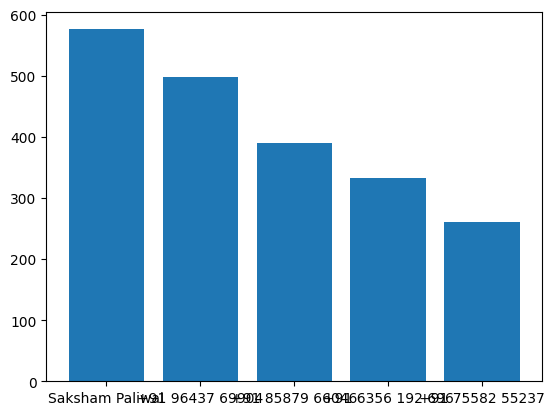

In [29]:
plt.bar(name,count)